In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
q_values = pd.read_csv('csv/q-values.csv')

actions = q_values.columns

q_values.rename(columns = {q_values.columns[0]: "State"}, inplace = True) 

q_values.head(10)

,State,Red,Green,Blue,Yellow,Skip,Reverse,Draw2,Draw4,Cc
0,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.102405,0.079192,0.051486,0.054239,0.0,0.0,0.016406,0.0,0.0
1,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 1)",0.419011,0.382926,0.291323,0.391606,0.0,0.0,0.260658,0.0,0.0
2,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 2)",0.296135,0.172111,0.242646,0.139676,0.0,0.0,0.170721,0.0,0.0
3,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 3)",0.188429,0.224183,0.160639,0.215863,0.0,0.0,0.102707,0.0,0.0
4,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 4)",0.144259,0.172078,0.146606,0.209773,0.0,0.0,0.122832,0.0,0.0
5,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 5)",0.136875,0.112285,0.154430,0.102487,0.0,0.0,0.060961,0.0,0.0
6,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 6)",0.084879,0.085339,0.072682,0.075309,0.0,0.0,0.053012,0.0,0.0
7,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 0, 7)",0.077913,0.070946,0.047443,0.071336,0.0,0.0,0.036516,0.0,0.0
8,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 1, 0)",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
9,"('Red', 'Number', 0, 0, 0, 0, 0, 0, 0, 1, 1)",0.832228,0.000164,0.000000,0.360000,0.0,0.0,0.200000,0.0,0.0


In [87]:
df = pd.read_csv('csv/records.csv')
df.drop(columns=df.columns[0], axis=1,  inplace=True)
new_row = pd.DataFrame({'Winner':'', 'Turns':0.0, 'Win_Rate':0.0}, index =[0])
df = pd.concat([new_row, df]).reset_index(drop = True)
df.head()

,Winner,Turns,Win_Rate
0,,0.0,0.000000
1,Bot,23.0,1.000000
2,AI,126.0,0.500000
3,Bot,60.0,0.666667
4,AI,19.0,0.500000


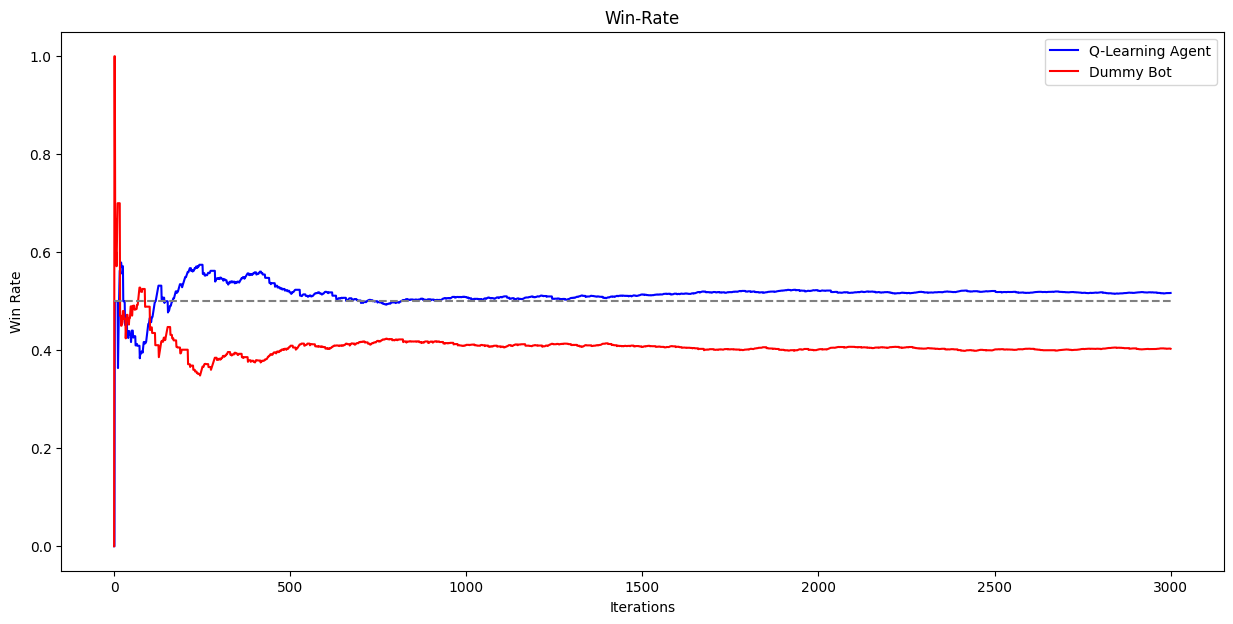

In [88]:
fig = plt.figure(1, figsize=(15,7))
ai_wins = [0]
bot_wins = [0]
for i in df.index:
    if i != 0:
        if df['Winner'][i] == 'AI':
            ai_wins.append(df['Win_Rate'][i])
            bot_wins.append(bot_wins[-1])
        elif df['Winner'][i] == 'Bot':
            bot_wins.append(df['Win_Rate'][i])
            ai_wins.append(ai_wins[-1])
        else:
            bot_wins.append(bot_wins[-1])
            ai_wins.append(ai_wins[-1])
plt.plot(df.index, ai_wins, color='blue', label='Q-Learning Agent')
plt.plot(df.index, bot_wins, color='red', label='Dummy Bot')
plt.hlines(0.5, 0, len(df), colors="grey", linestyles="dashed")

plt.title("Win-Rate")
plt.xlabel("Iterations")
plt.ylabel("Win Rate")
plt.legend()
plt.show()